In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
plt.style.use('bmh')




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mihirk51/Life-expectancy-prediction/main/Life%20Expectancy%20Data.csv', engine = 'python', sep=r'\s*,\s*')

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
country_unique=df['Country'].unique()
print(country_unique)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [ ]:
len(country_unique)

193

In [ ]:
status_unique=df['Status'].unique()
print(status_unique)
len(status_unique)

['Developing' 'Developed']


2

In [ ]:
df_corr=df.corr()
df_corr.reset_index()

,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
1,Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
2,Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
3,infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
4,Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
5,percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
6,Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
7,Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
8,BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
9,under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [ ]:
hm1 = df_corr

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

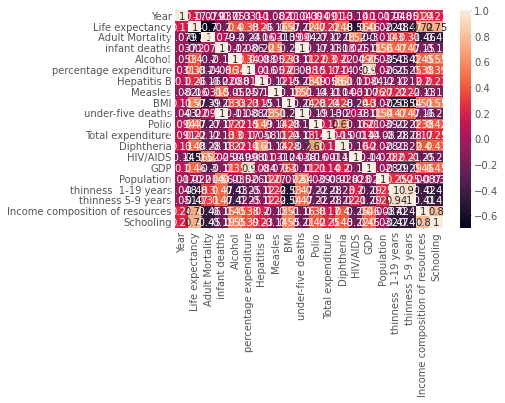

In [ ]:
hm = sn.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
pairs = df_corr.unstack()
pairs
x = pairs.sort_values()
x[('Life expectancy')].sort_values(ascending = False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
dtype: float64

In [ ]:
df.shape
df.columns
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


Country - 0.0%
Year - 0.0%
Status - 0.0%
Life expectancy - 0.0034036759700476512%
Adult Mortality - 0.0034036759700476512%
infant deaths - 0.0%
Alcohol - 0.06603131381892444%
percentage expenditure - 0.0%
Hepatitis B - 0.18822328114363512%
Measles - 0.0%
BMI - 0.011572498298162015%
under-five deaths - 0.0%
Polio - 0.006466984343090538%
Total expenditure - 0.07692307692307693%
Diphtheria - 0.006466984343090538%
HIV/AIDS - 0.0%
GDP - 0.1524846834581348%
Population - 0.22191967324710687%
thinness  1-19 years - 0.011572498298162015%
thinness 5-9 years - 0.011572498298162015%
Income composition of resources - 0.056841388699795777%
Schooling - 0.05547991831177672%


In [ ]:
df1 = df.dropna()

In [ ]:
df1.reset_index(drop=True, inplace = True)
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df1['Status'] = df1['Status'].apply(lambda x: ['Developing', 'Developed'].index(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df1['Status'][1000]


0

In [ ]:
df1['Country'][16]

'Albania'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1649.000000
mean       38.128623
std        19.754249
min         2.000000
25%        19.500000
50%        43.700000
75%        55.800000
max        77.100000
Name: BMI, dtype: float64


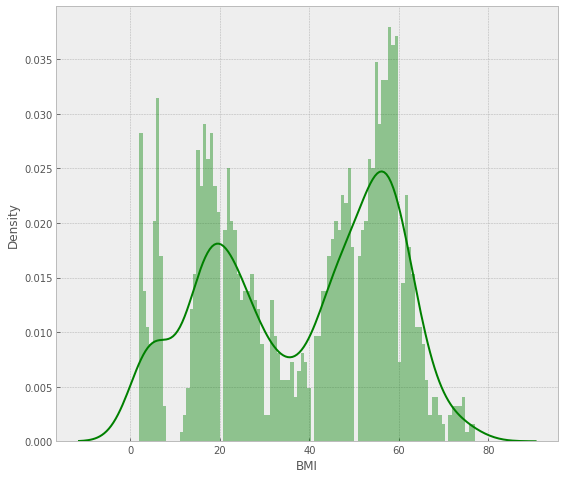

In [ ]:
print(df1['BMI'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['BMI'], color='g', bins=100, hist_kws={'alpha': 0.4});

[[1.         0.54204159]
 [0.54204159 1.        ]]


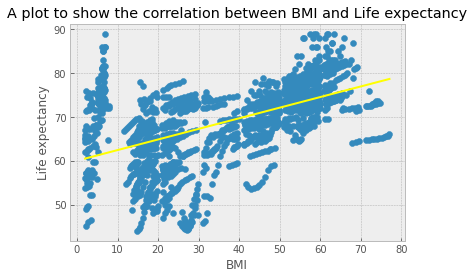

In [ ]:
x = df1['BMI']
y = df1['Life expectancy']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('A plot to show the correlation between BMI and Life expectancy')
plt.xlabel('BMI')
plt.ylabel('Life expectancy')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

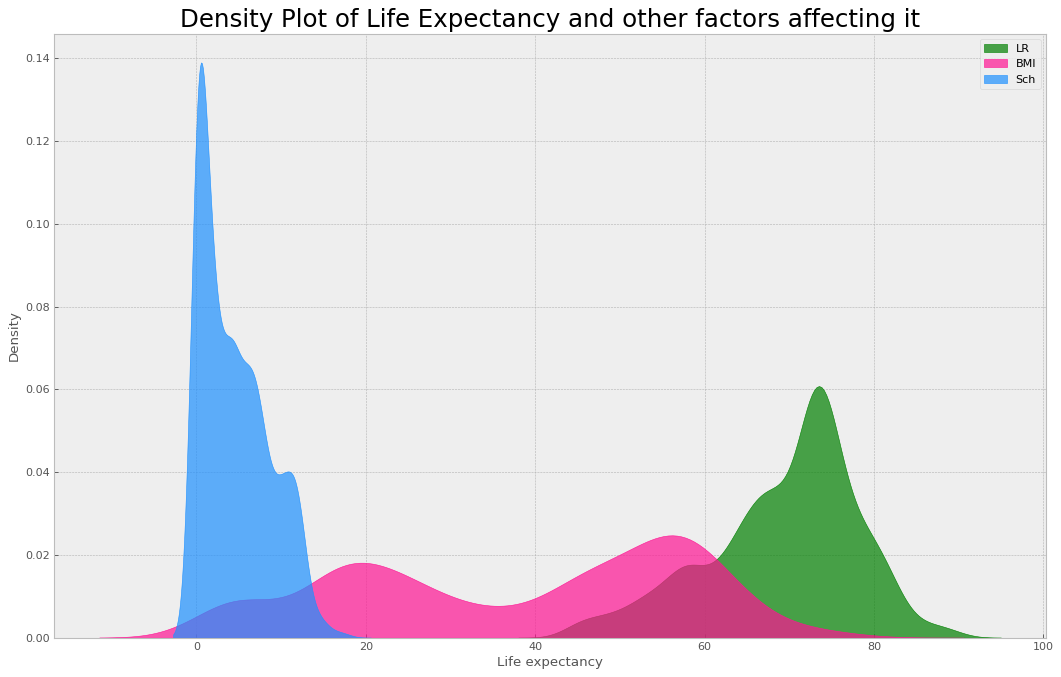

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df1['Life expectancy'], shade=True, color="g", label="LR", alpha=.7)
sns.kdeplot(df1['BMI'], shade=True, color="deeppink", label="BMI", alpha=.7)
sns.kdeplot(df1['Alcohol'], shade=True, color="dodgerblue", label="Sch", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of Life Expectancy and other factors affecting it', fontsize=22)
plt.legend()
plt.show()

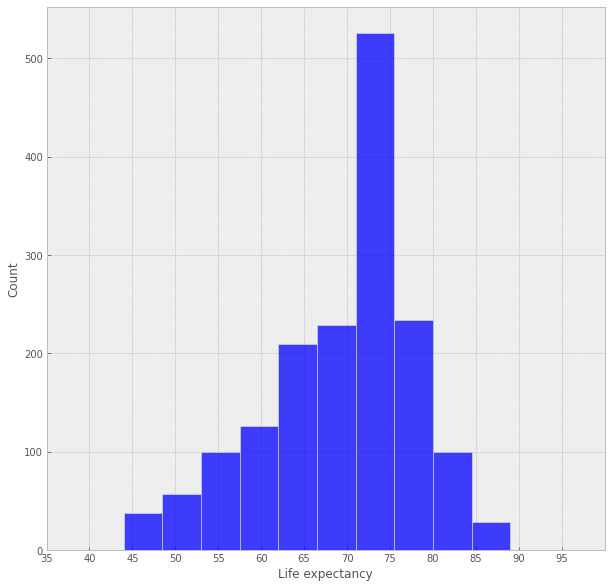

In [ ]:
# Plotting distribution of life expectancy around the world
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
p = sns.histplot(df1['Life expectancy'], bins = 10)
p.set_xticks(range(0,100,5))
plt.xlim(35,100)
plt.show()

Text(0, 0.5, 'Income composition of resources')

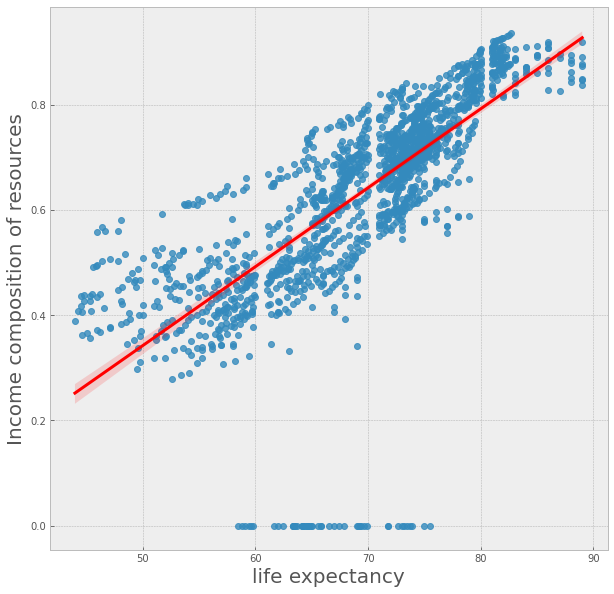

In [ ]:
# Since life expectancy and Income composition of resources are highly correlated, we plot the relation between them
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt1 = sns.regplot(x = 'Life expectancy', y = 'Income composition of resources', data = df1, line_kws={"color":"red"})
plt1.set_xlabel("life expectancy", fontsize = 20)
plt1.set_ylabel("Income composition of resources", fontsize = 20)

In [ ]:
df2 = df1.drop(["Country","Year"], axis=1)

In [ ]:
df2

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


OLS MODEL FOR VARIABLE SELECTION

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
y = df2["Life expectancy"]
X = df2.drop(["Life expectancy"], axis=1)

In [ ]:
X = sm.add_constant(X) # by default statsmodels does not add an intercept
# add a constant is the same as adding a column of 1 to X .
ols_model = sm.OLS(y, X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     435.7
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:38:25   Log-Likelihood:                -4436.5
No. Observations:                1649   AIC:                             8913.
Df Residuals:                    1629   BIC:                             9021.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.4827      0.738     72.515      0.000      52.036      54.929
Status                              0.9684      0.338      2.865      0.004       0.306       1.631
Adult Mortality                    -0.0166      0.001    -17.517      0.000      -0.018      -0.015
infant deaths                       0.0935      0.011      8.777      0.000       0.073       0.114
Alcohol                            -0.0914      0.033     -2.756      0.006      -0.156      -0.026
percentage expenditure              0.0004      0.000      2.040      0.042    1.41e-05       0.001
Hepatitis B                        -0.0065      0.004     -1.467      0.143      -0.015       0.002
Measles                         -7.865e-06   1.08e-05     -0.729      0.466    -2.9e-05    1.33e-05
BMI                                 0.0338      0.006      5.628      0.000       0.022       0.046
under-five deaths                  -0.0703      0.008     -9.123      0.000      -0.085      -0.055
Polio                               0.0079      0.005      1.540      0.124      -0.002       0.018
Total expenditure                   0.0759      0.041      1.865      0.062      -0.004       0.156
Diphtheria                          0.0149      0.006      2.513      0.012       0.003       0.027
HIV/AIDS                           -0.4370      0.018    -24.490      0.000      -0.472      -0.402
GDP                              8.738e-06   2.84e-05      0.308      0.758   -4.69e-05    6.44e-05
Population                      -6.425e-10   1.75e-09     -0.367      0.713   -4.07e-09    2.79e-09
thinness  1-19 years               -0.0124      0.053     -0.234      0.815      -0.116       0.092
thinness 5-9 years                 -0.0480      0.052     -0.917      0.359      -0.151       0.055
Income composition of resources     9.8166      0.832     11.797      0.000       8.184      11.449
Schooling                           0.8665      0.059     14.587      0.000       0.750       0.983
==============================================================================
Omnibus:                       35.951   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.173
Skew:                          -0.149   Prob(JB):                     1.16e-14
Kurtosis:                       3.919   Cond. No.                     7.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ols_model.pvalues

const                               0.000000e+00
Status                              4.216969e-03
Adult Mortality                     4.421388e-63
infant deaths                       4.167810e-18
Alcohol                             5.918326e-03
percentage expenditure              4.155722e-02
Hepatitis B                         1.426532e-01
Measles                             4.659661e-01
BMI                                 2.146026e-08
under-five deaths                   2.098455e-19
Polio                               1.236975e-01
Total expenditure                   6.235983e-02
Diphtheria                          1.205217e-02
HIV/AIDS                           4.926216e-113
GDP                                 7.581264e-01
Population                          7.133726e-01
thinness  1-19 years                8.152678e-01
thinness 5-9 years                  3.591677e-01
Income composition of resources     7.022005e-31
Schooling                           2.172561e-45
dtype: float64

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['const', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'BMI', 'under-five deaths', 'Diphtheria', 'HIV/AIDS', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


RFE MODEL FOR VARIABLE SELECTION

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model_rfe = LinearRegression()
model_rfe.fit(X,y)
model_rfe.coef_


array([ 0.00000000e+00,  9.68378065e-01, -1.67767238e-02,  9.12532521e-02,
       -8.60143505e-02,  4.33153039e-04,  3.41131490e-02, -6.91171757e-02,
        1.53482697e-02, -4.32481453e-01, -6.01988939e-02,  9.81394113e+00,
        8.82250341e-01])

In [ ]:
model_RFE = RFE(model_rfe, n_features_to_select=25)
model_RFE.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [ ]:
model_RFE.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
X.loc[:, model_RFE.get_support()]

,const,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling
0,1.0,0,263.0,62,0.01,71.279624,19.1,83,65.0,0.1,17.3,0.479,10.1
1,1.0,0,271.0,64,0.01,73.523582,18.6,86,62.0,0.1,17.5,0.476,10.0
2,1.0,0,268.0,66,0.01,73.219243,18.1,89,64.0,0.1,17.7,0.470,9.9
3,1.0,0,272.0,69,0.01,78.184215,17.6,93,67.0,0.1,18.0,0.463,9.8
4,1.0,0,275.0,71,0.01,7.097109,17.2,97,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1.0,0,723.0,27,4.36,0.000000,27.1,42,65.0,33.6,9.4,0.407,9.2
1645,1.0,0,715.0,26,4.06,0.000000,26.7,41,68.0,36.7,9.9,0.418,9.5
1646,1.0,0,73.0,25,4.43,0.000000,26.3,40,71.0,39.8,1.3,0.427,10.0
1647,1.0,0,686.0,25,1.72,0.000000,25.9,39,75.0,42.1,1.7,0.427,9.8


In [ ]:
df2

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


LASSOLARSIC FOR VARIABLE SELECTION

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LassoLarsIC
model_bic = linear_model.LassoLarsIC(criterion="bic", normalize=True)

In [ ]:
model_bic.fit(X, y)

LassoLarsIC(criterion='bic', normalize=True)

In [ ]:
X.columns[np.abs(model_bic.coef_) > 0]

Index(['Adult Mortality', 'percentage expenditure', 'BMI', 'Diphtheria',
       'HIV/AIDS', 'thinness 5-9 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [ ]:
# Selecting features used by LassoLarsIC to implement into the linear regression model
y = df2["Life expectancy"]
X = df2[['Adult Mortality', 'percentage expenditure', 'BMI', 'Diphtheria',
       'HIV/AIDS', 'thinness 5-9 years', 'Income composition of resources',
       'Schooling']]

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from  sklearn import metrics
# predicting the accuracy score
r2= r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
ae = metrics.mean_absolute_error(y_test, y_prediction)
print('absolute error is', ae)
print('r2 socre is ',r2)
print('mean_sqrd_error is ',mse)
print('root_mean_squared error of is ',rmse)

absolute error is 2.828786154322188
r2 socre is  0.8245555996121279
mean_sqrd_error is  14.627506738324843
root_mean_squared error of is  3.824592362373387


In [ ]:
adj_r2_lr = 1 - (1-r2)*(len(df2) - 1) / (len(df2) - (df2.shape[1] - 1) - 1)
print(r2, adj_r2_lr)

0.8245555996121279 0.8225092867776469


**LASSO CV MODEL**

In [ ]:
from sklearn.linear_model import Lasso, LassoCV, lars_path
# Selecting features selected by OLS model and rfe to implement using lassoCV model
y1 = df2["Life expectancy"]
X1 = df2[['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'BMI', 'under-five deaths', 
          'Diphtheria', 'HIV/AIDS', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [ ]:
model_lassoCV = LassoCV(cv=5, normalize=True) # note we don't need to normalize again
model_lassoCV.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=5, normalize=True)

In [ ]:
y_hat_test = model_lassoCV.predict(X1_test)
# note we transform X_test using the scaler learned from the train set

In [ ]:
from sklearn import metrics
metrics.mean_squared_error(y_true=y1_test, y_pred=y_hat_test)

13.690542232020407

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from  sklearn import metrics
# predicting the accuracy score
r2_lassocv= r2_score(y1_test,y_hat_test)
mse_lassocv = mean_squared_error(y1_test,y_hat_test)
rmse_lassocv = np.sqrt(mean_squared_error(y1_test,y_hat_test))
ae_lassocv = metrics.mean_absolute_error(y1_test, y_hat_test)
print('LassoCV absolute error is', ae_lassocv)
print('LassoCV r2 score is ',r2_lassocv)
print('LassoCV mean_sqrd_error is ',mse_lassocv)
print('LassoCV root_mean_squared error of is ',rmse_lassocv)

LassoCV absolute error is 2.909085660729566
LassoCV r2 score is  0.8156854225824309
LassoCV mean_sqrd_error is  13.690542232020407
LassoCV root_mean_squared error of is  3.7000732738718036


In [ ]:
adj_r2_lassocv = 1 - (1-r2_lassocv)*(len(df2) - 1) / (len(df2) - (df2.shape[1] - 1) - 1)
print(r2_lassocv, adj_r2_lassocv)

0.8156854225824309 0.8135356515751051


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 2/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 3/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 5/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 6/6

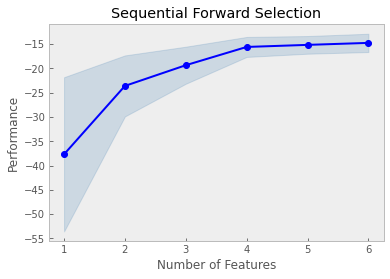

Selected features are-->
 ('Adult Mortality', 'percentage expenditure', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling')


In [ ]:
#SFSMODEL
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# df_1= df1.drop(["Country","Year"], axis=1)
# y_1 = df_1["Life expectancy"]
# X_1= df_1.drop(["Life expectancy"], axis=1)

y_1 = y
X_1= X
model_3 = LinearRegression()
model_3.fit(X_1, y_1)
model_3.coef_
feat_n=6
model_sfs = SFS(model_3, scoring='neg_mean_squared_error', k_features=feat_n, verbose=1, cv=5,)
model_sfs.fit(X_1, y_1)
model_sfs.get_metric_dict()
aa=pd.DataFrame.from_dict(model_sfs.get_metric_dict()).T
# print(aa)



fig1 = plot_sfs(model_sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()



a1=aa.loc[feat_n,"feature_names"]
print('Selected features are-->\n',a1)







In [ ]:
aa

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[-42.23685999337042, -22.468518292812057, -45....",-37.6963,"(Income composition of resources,)",20.3739,15.8516,7.92581
2,"(0, 6)","[-21.788366427181018, -18.567158396050196, -23...",-23.6333,"(Adult Mortality, Income composition of resour...",8.06024,6.27114,3.13557
3,"(0, 4, 6)","[-21.269275217154547, -15.85108970185989, -20....",-19.3776,"(Adult Mortality, HIV/AIDS, Income composition...",4.89587,3.80916,1.90458
4,"(0, 4, 6, 7)","[-15.339907619012273, -15.087121442226557, -14...",-15.6215,"(Adult Mortality, HIV/AIDS, Income composition...",2.64109,2.05486,1.02743
5,"(0, 2, 4, 6, 7)","[-15.408819997048646, -14.66461591306073, -14....",-15.1959,"(Adult Mortality, BMI, HIV/AIDS, Income compos...",2.33805,1.81908,0.90954
6,"(0, 1, 2, 4, 6, 7)","[-15.157529670110687, -14.45108041720835, -13....",-14.7874,"(Adult Mortality, percentage expenditure, BMI,...",2.41647,1.8801,0.940048


In [ ]:
y2=df2["Life expectancy"]
X2 = df2[['Adult Mortality', 'percentage expenditure', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)
model_3a = LinearRegression()


model_3a.fit(X2_train,y2_train)

# X_selected = model_sfs.transform(X2_train)
# X_selected.shape
# model_3_after_selection = model_3.fit(X_selected, y2_train)

y_prediction1 =  model_3a.predict(X2_test)
# sel=model_3_after_selection.predict(X_selected)[:10] 
# print(sel)


r2a= r2_score(y2_test,y_prediction1)
msea = mean_squared_error(y2_test,y_prediction1)
rmsea = np.sqrt(mean_squared_error(y2_test,y_prediction1))
aea = metrics.mean_absolute_error(y2_test, y_prediction1)
print('absolute error is', aea)
print('r2 socre is ',r2a)
print('mean_sqrd_error is ',msea)
print('root_mean_squared error of is ',rmsea)

absolute error is 2.7519371205903043
r2 socre is  0.843315517268411
mean_sqrd_error is  13.665346998840604
root_mean_squared error of is  3.696667012166582


In [ ]:
adj_r2_lra = 1 - (1-r2a)*(len(df2) - 1) / (len(df2) - (df2.shape[1] - 1) - 1)
print(r2a, adj_r2_lra)

0.843315517268411 0.8414880125588344


Text(0, 0.5, 'HIV/AIDS')

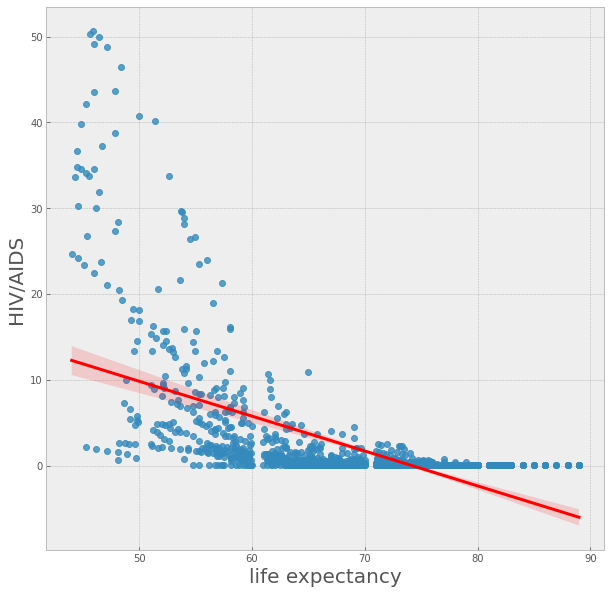

In [ ]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 10)
plt2 = sns.regplot(x = 'Life expectancy', y = 'HIV/AIDS', data = df1, line_kws={"color":"red"})
plt2.set_xlabel("life expectancy", fontsize = 20)
plt2.set_ylabel("HIV/AIDS", fontsize = 20)